In [7]:
!pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
from qiskit import *

In [9]:
circuit = QuantumCircuit(3,3)

circuit.x(0) # optional, we want to transfer state 1 in this example

circuit.barrier()

circuit.h(1)
circuit.cx(1,2)

circuit.barrier()

In [10]:
%matplotlib inline

In [12]:
circuit.draw()

┌───┐ ░            ░ 
q_0: ┤ X ├─░────────────░─
     └───┘ ░ ┌───┐      ░ 
q_1: ──────░─┤ H ├──■───░─
           ░ └───┘┌─┴─┐ ░ 
q_2: ──────░──────┤ X ├─░─
           ░      └───┘ ░ 
c: 3/═════════════════════

In [13]:
circuit.cx(0,1)
circuit.h(0)

circuit.barrier()
circuit.draw()

┌───┐ ░            ░      ┌───┐ ░ 
q_0: ┤ X ├─░────────────░───■──┤ H ├─░─
     └───┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ 
q_1: ──────░─┤ H ├──■───░─┤ X ├──────░─
           ░ └───┘┌─┴─┐ ░ └───┘      ░ 
q_2: ──────░──────┤ X ├─░────────────░─
           ░      └───┘ ░            ░ 
c: 3/══════════════════════════════════

In [14]:
circuit.measure([0, 1], [0, 1])

circuit.barrier()
circuit.draw()

┌───┐ ░            ░      ┌───┐ ░ ┌─┐    ░ 
q_0: ┤ X ├─░────────────░───■──┤ H ├─░─┤M├────░─
     └───┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░ 
q_1: ──────░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├─░─
           ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ░ 
q_2: ──────░──────┤ X ├─░────────────░──╫──╫──░─
           ░      └───┘ ░            ░  ║  ║  ░ 
c: 3/═══════════════════════════════════╩══╩════
                                        0  1

In [15]:
circuit.cx(1, 2)
circuit.cz(0, 2)
circuit.measure([2], [2])
circuit.draw()

┌───┐ ░            ░      ┌───┐ ░ ┌─┐    ░            
q_0: ┤ X ├─░────────────░───■──┤ H ├─░─┤M├────░───────■────
     └───┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░       │    
q_1: ──────░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├─░───■───┼────
           ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ░ ┌─┴─┐ │ ┌─┐
q_2: ──────░──────┤ X ├─░────────────░──╫──╫──░─┤ X ├─■─┤M├
           ░      └───┘ ░            ░  ║  ║  ░ └───┘   └╥┘
c: 3/═══════════════════════════════════╩══╩═════════════╩═
                                        0  1             2

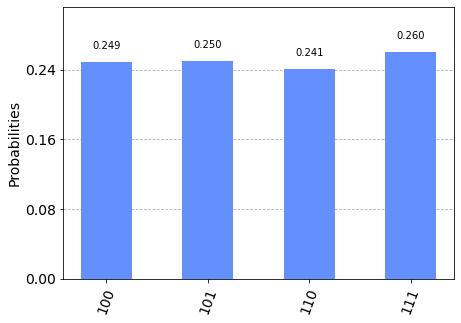

In [16]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1024).result()
from qiskit.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))